In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd

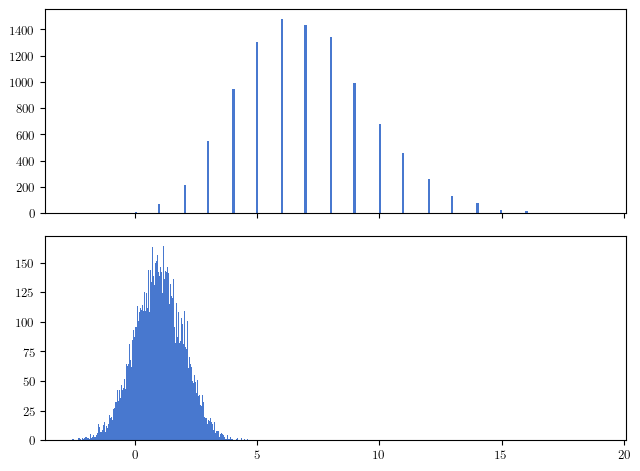

In [2]:
plt.style.use("seaborn-v0_8-muted")
def set_size(width_pt=472.31595, fraction=1, subplots=(1, 1)):
    """Set figure dimensions nicely

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5 ** .5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return fig_width_in, fig_height_in

# Colormap with University colors
colors = ["white", "#005f9b", "#153268"]
nodes = [0.0, 0.8, 1.0]
unimap = matplotlib.colors.LinearSegmentedColormap.from_list("unimap", list(zip(nodes, colors)))
unimap_r = unimap.reversed()
try:
    matplotlib.colormaps.register(cmap=unimap)
    matplotlib.colormaps.register(cmap=unimap_r)
except ValueError:
    pass

# LaTeX text renderer
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "font.serif": "Computer Modern Roman",
    "text.usetex": True,  # use inline math for ticks
    "text.latex.preamble": r"\usepackage{amsmath}",
    "pgf.rcfonts": False,  # don't setup fonts from rc parameters
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10.95,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    # Cmap
    "image.cmap": "unimap"
})
 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=set_size(fraction=1, subplots=(1.2, 1)), sharex=True)

ax1.hist(np.random.poisson(7, 10000), bins=200)
ax2.hist(np.random.normal(1, 1, 10000), bins=200)

plt.tight_layout()
plt.show()
fig.savefig('style.pdf', format='pdf', bbox_inches='tight', dpi=300)

In [3]:
import os

In [4]:
withs = []

for fname in os.listdir("effects/fluo/with/"):
    withs.append(list(pd.read_csv("effects/fluo/with/"+fname)["LNK"]))

withouts = []

for fname in os.listdir("effects/fluo/without/"):
    withouts.append(list(pd.read_csv("effects/fluo/without/"+fname)["LNK"]))

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['axes.prop_cycle'] = mpl.cycler(color=mpl.cm.Set2(range(8)))

/tmp/ipykernel_147/3315580545.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('Set2')


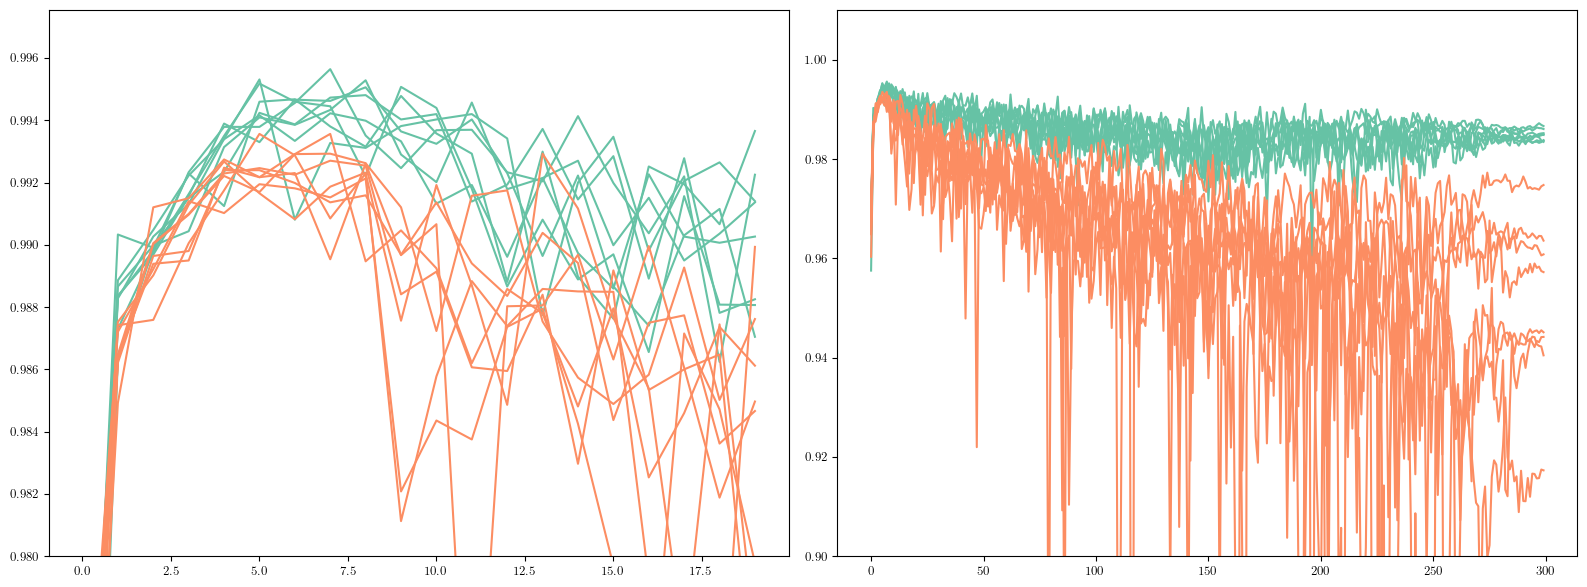

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(1,2, figsize=(16,6))

cmap = mpl.cm.get_cmap('Set2')
num_colors = len(withs) + len(withouts)

colors = [cmap(i / num_colors) for i in range(num_colors)]
ca = colors[0]
cb = colors[2]

for s in withs:
    ax.flat[0].plot(s[:20], color=ca)

for s in withouts:
    ax.flat[0].plot(s[:20], color=cb)


ax.flat[0].set_ylim(bottom=0.98)

for s in withs:
    ax.flat[1].plot(s[:], color=ca)

for s in withouts:
    ax.flat[1].plot(s[:], color=cb)
    


ax.flat[1].set_ylim(bottom=0.90)

fig.tight_layout()
plt.savefig("embeddings_effect_fluo_rough.pdf")


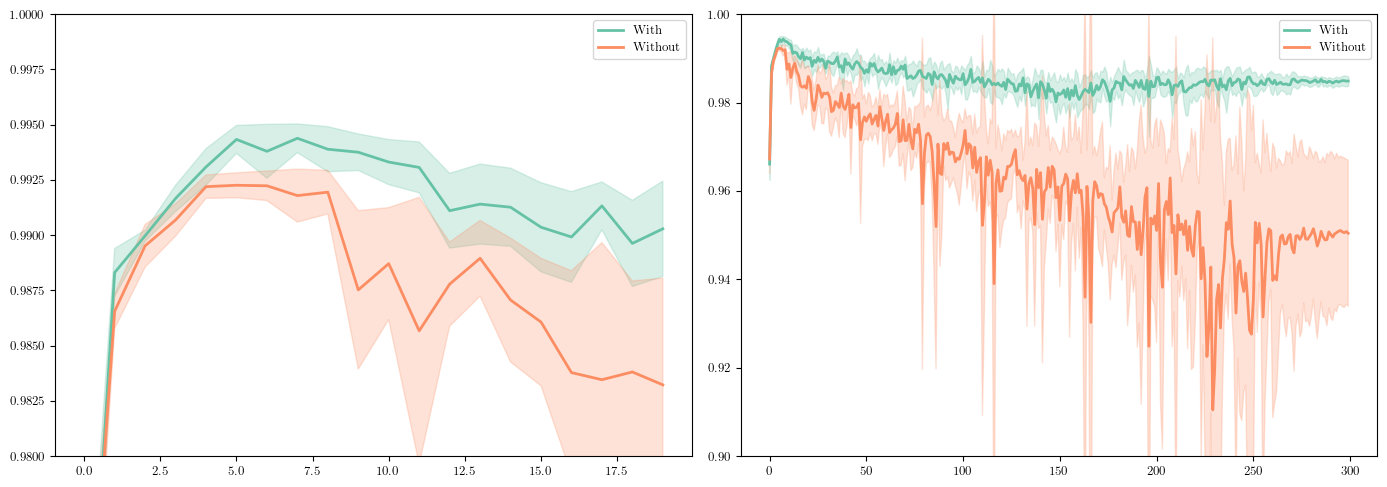

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(1, 2, figsize=(14,5))

cmap = mpl.colormaps['Set2']
ca, cb = cmap(0), cmap(1)

def plot_mean_shaded(ax, data, color, label, maxlen=None):
    arr = np.array([d[:maxlen] for d in data])
    mean = arr.mean(axis=0)
    std  = arr.std(axis=0)

    x = np.arange(len(mean))
    ax.plot(x, mean, color=color, label=label, linewidth=2)
    ax.fill_between(x, mean-std, mean+std, color=color, alpha=0.25)

# left: zoomed (first 20)
plot_mean_shaded(ax[0], withs, ca, "With", maxlen=20)
plot_mean_shaded(ax[0], withouts, cb, "Without", maxlen=20)
ax[0].set_ylim(0.98, 1.0)
ax[0].legend()

# right: entire sequence
plot_mean_shaded(ax[1], withs, ca, "With")
plot_mean_shaded(ax[1], withouts, cb, "Without")
ax[1].set_ylim(0.90, 1.0)
ax[1].legend()

fig.tight_layout()
plt.savefig("embeddings_effect_fluo_aggregated.pdf")


### Significance over time

In [18]:
from scipy import stats

pvals = []

for idx in range(len(withs[0])):

    w = [x[idx] for x in withs]
    wo = [x[idx] for x in withouts]

    res = stats.ttest_ind(w, wo)

    
    pval = res.pvalue

    pvals.append(pval)

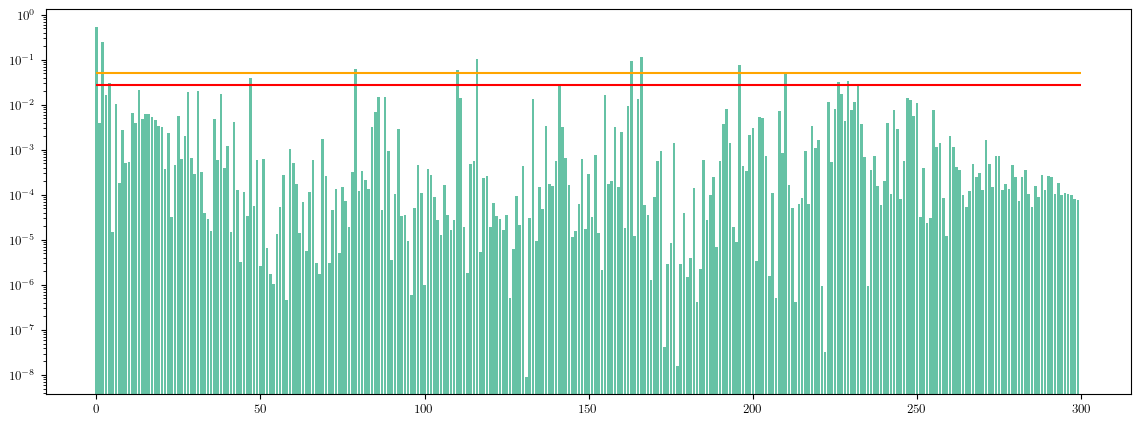

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))

x = np.arange(len(pvals))
ax.bar(x, pvals)
ax.set_yscale('log')
ax.hlines(0.05, 0, 300, color='orange') # 0.05
ax.hlines(0.027, 0, 300, color='red') # 3 sigma